In [6]:
import pandas as pd  
from scan import scan_helpers
from scan import no3_calibrations
import matplotlib.pyplot as plt

In [4]:
rme = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06_reynoldseast_10mm.fp')
dobson = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06-dobson-10mm.fp')
tollgate = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06-tollgate-10mm.fp')


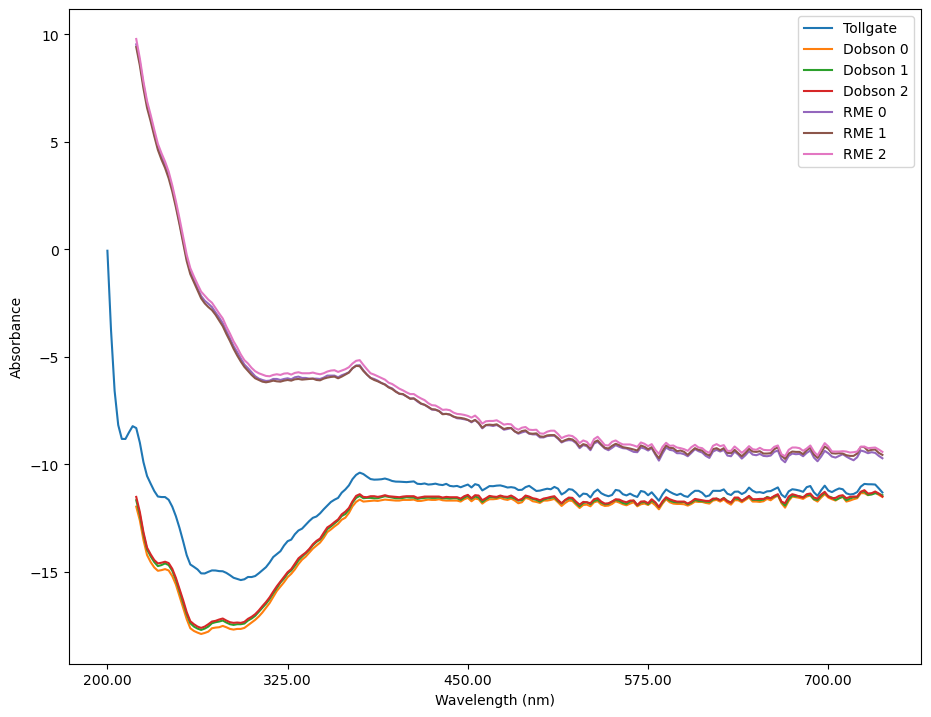

In [7]:
fig, ax = plt.subplots(figsize = (11,8.5))
scan_helpers.plot_scan_fp(tollgate,0, ax= ax, label= 'Tollgate')
scan_helpers.plot_scan_fp(dobson,range(0,3), ax= ax, label= ['Dobson 0', 'Dobson 1', 'Dobson 2'])

scan_helpers.plot_scan_fp(rme,range(0,3), ax= ax, label= ['RME 0','RME 1', 'RME 2'])



- dobson and RME are virtually the same, tollgate is substantially different. 
- but tollgate was acquired in auto mode, not logger, so maybe its an artifact

# LOD Testing

In [8]:
rme_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-rme-5mm.fp')
dobson_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-dobson-5mm.fp')
tollgate_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-tollgate-5mm.fp')
rme_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-rme-35mm.fp')
dobson_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-dobson-35mm.fp')
tollgate_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-tollgate-35mm.fp')



Text(0.5, 1.0, 'Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL')

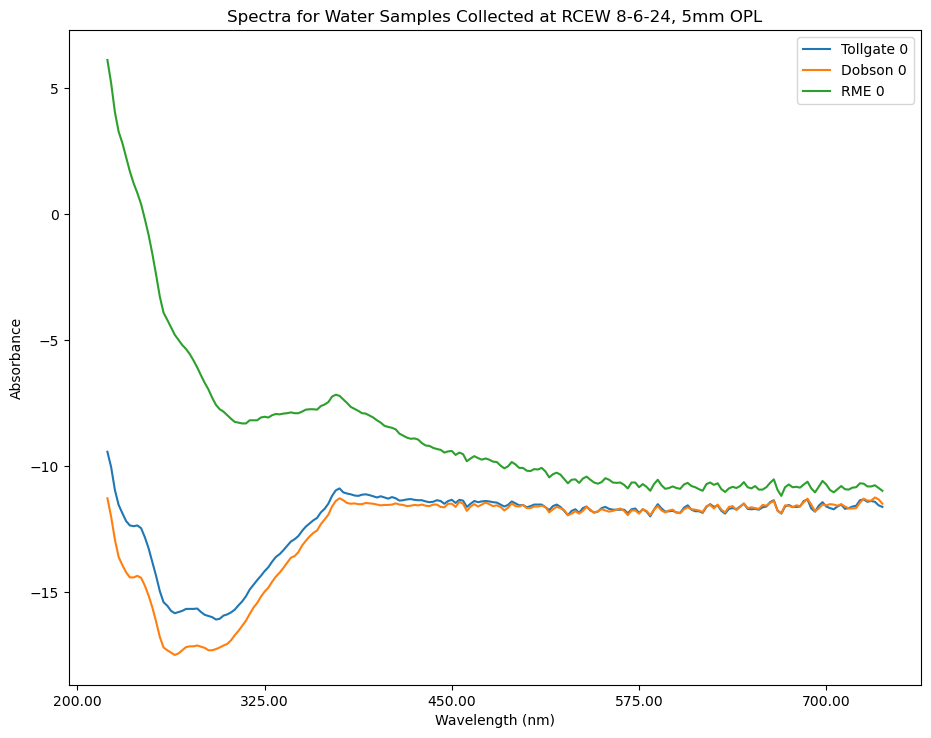

In [9]:
fig2, ax2 = plt.subplots(figsize=(11,8.5))

scan_helpers.plot_scan_fp(tollgate_5mm,range(0,1), ax= ax2, label= [f"Tollgate {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(dobson_5mm,range(0,1), ax= ax2, label= [f"Dobson {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(rme_5mm,range(0,1), ax= ax2, label= [f"RME {i}" for i in range(0, 1)])

ax2.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL")

- slight differences in absorbance spectra.

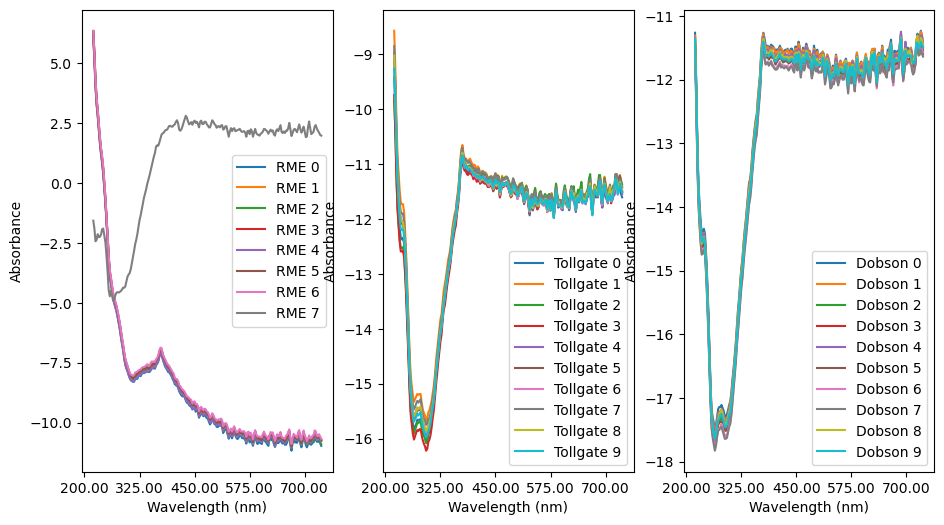

In [10]:
fig2, ax2 = plt.subplots(ncols = 3, figsize=(11,6))

scan_helpers.plot_scan_fp(rme_5mm,range(0,8), ax= ax2[0], label= [f"RME {i}" for i in range(0, 8)])
scan_helpers.plot_scan_fp(tollgate_5mm,range(0,10), ax= ax2[1], label= [f"Tollgate {i}" for i in range(0, 10)])
scan_helpers.plot_scan_fp(dobson_5mm,range(0,10), ax= ax2[2], label= [f"Dobson {i}" for i in range(0, 10)])

#ax2.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL")

- so tollgate and dobson spectra are all nice and consistent
- RME spectra get messed up and differentr from 7 on - I'm going to assume this is from the flow cell draining

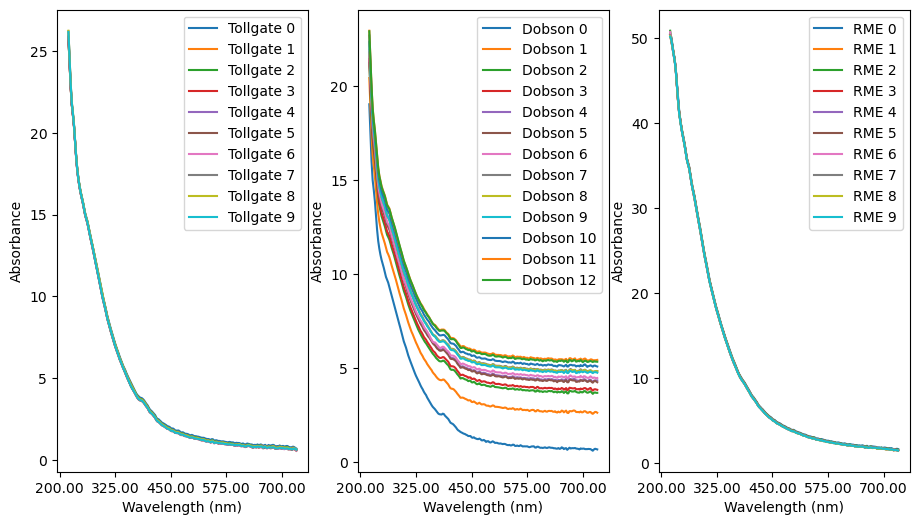

In [11]:
fig3, ax3 = plt.subplots(ncols=3, figsize=(11,6))

scan_helpers.plot_scan_fp(tollgate_35mm,range(0,10), ax= ax3[0], label= [f"Tollgate {i}" for i in range(0, 10)])
scan_helpers.plot_scan_fp(dobson_35mm,range(0,13), ax= ax3[1], label= [f"Dobson {i}" for i in range(0, 13)])
scan_helpers.plot_scan_fp(rme_35mm,range(0,10), ax= ax3[2], label= [f"RME {i}" for i in range(0, 10)])

#ax3.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 35mm OPL")

- RME and tollgate spectra are nice and consistent
- for some reason the dobson spectra drifts. could it be a temperture thign? have to wait for it to warm up?

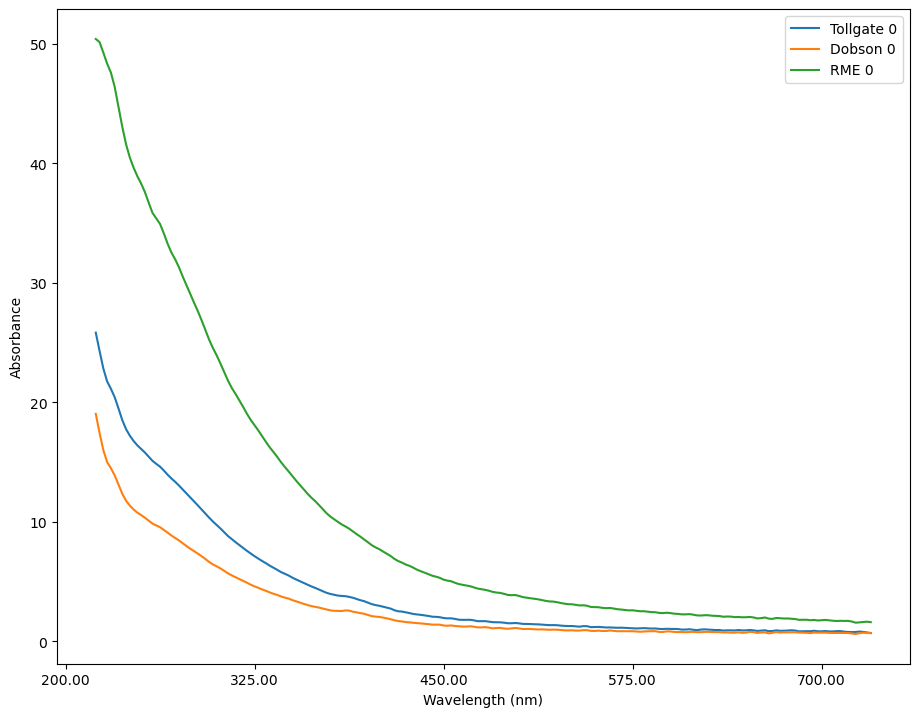

In [12]:
fig4, ax4 = plt.subplots(figsize=(11,8.5))

scan_helpers.plot_scan_fp(tollgate_35mm,range(0,1), ax= ax4, label= [f"Tollgate {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(dobson_35mm,range(0,1), ax= ax4, label= [f"Dobson {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(rme_35mm,range(0,1), ax= ax4, label= [f"RME {i}" for i in range(0, 1)])

#ax3.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 35mm OPL")

- spectra are all slightly different but have same basic shape
- these spectra look somewhat different than nitrate spectra in DI water - nitrate peak (if that's what it is) is much wider
- what is blank 35mm spectra in air?

In [13]:
tollgate_5mm = no3_calibrations.one_wavelength(tollgate_5mm.loc[0:10], output_calibrated=True, slope=6.52, intercept = 168.6) # slope and intercept from 2-20-24 DI calibrations
tollgate_5mm.mean()

/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength'] = df[wavelength]
/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength_no3'] = df[prefix+'one_wavelength']*slope+intercept
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/3456154066.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

200.00                       NaN
202.50                       NaN
205.00                       NaN
207.50                       NaN
210.00                       NaN
                         ...    
745.00                       NaN
747.50                       NaN
750.00                       NaN
one_wavelength         -9.218727
one_wavelength_no3    108.493898
Length: 223, dtype: float64

In [14]:
dobson_5mm = no3_calibrations.one_wavelength(dobson_5mm.loc[0:10], output_calibrated=True, slope=6.52, intercept = 168.6) # slope and intercept from 2-20-24 DI calibrations
dobson_5mm.mean()

/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength'] = df[wavelength]
/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength_no3'] = df[prefix+'one_wavelength']*slope+intercept
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/653570803.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include dateti

200.00                      NaN
202.50                      NaN
205.00                      NaN
207.50                      NaN
210.00                      NaN
                        ...    
745.00                      NaN
747.50                      NaN
750.00                      NaN
one_wavelength       -11.410455
one_wavelength_no3    94.203836
Length: 223, dtype: float64

In [15]:
rme_5mm = no3_calibrations.one_wavelength(rme_5mm.loc[0:7], output_calibrated=True, slope=6.52, intercept = 168.6) # slope and intercept from 2-20-24 DI calibrations
rme_5mm.mean()

/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength'] = df[wavelength]
/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength_no3'] = df[prefix+'one_wavelength']*slope+intercept
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/3413125355.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

200.00                      NaN
202.50                      NaN
205.00                      NaN
207.50                      NaN
210.00                      NaN
                        ...    
745.00                      NaN
747.50                      NaN
750.00                      NaN
one_wavelength          5.24425
one_wavelength_no3    202.79251
Length: 223, dtype: float64

In [16]:
rme_35mm = no3_calibrations.one_wavelength(rme_35mm.loc[0:10], output_calibrated=True, slope=3.26, intercept = 0.33) # slope and intercept from 2-20-24 DI calibrations
rme_35mm.mean()

/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength'] = df[wavelength]
/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength_no3'] = df[prefix+'one_wavelength']*slope+intercept
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/4132831400.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

200.00                       NaN
202.50                       NaN
205.00                       NaN
207.50                       NaN
210.00                       NaN
                         ...    
745.00                       NaN
747.50                       NaN
750.00                       NaN
one_wavelength         50.486091
one_wavelength_no3    164.914656
Length: 223, dtype: float64

In [17]:
dobson_35mm = no3_calibrations.one_wavelength(dobson_35mm.loc[0:10], output_calibrated=True, slope=3.26, intercept = 0.33) # slope and intercept from 2-20-24 DI calibrations
dobson_35mm.mean()

/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength'] = df[wavelength]
/Users/beneck/Repos/rcew-nitrate/scan/no3_calibrations.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix+'one_wavelength_no3'] = df[prefix+'one_wavelength']*slope+intercept
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/981578051.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include dateti

200.00                      NaN
202.50                      NaN
205.00                      NaN
207.50                      NaN
210.00                      NaN
                        ...    
745.00                      NaN
747.50                      NaN
750.00                      NaN
one_wavelength        21.585818
one_wavelength_no3    70.699767
Length: 223, dtype: float64

In [19]:
tollgate_35mm = no3_calibrations.one_wavelength(tollgate_35mm.loc[0:10], output_calibrated=True, slope=3.26, intercept = 0.33) # slope and intercept from 2-20-24 DI calibrations
tollgate_35mm.mean()

/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_2128/1084864366.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  tollgate_35mm.mean()


200.00                      NaN
202.50                      NaN
205.00                      NaN
207.50                      NaN
210.00                      NaN
                        ...    
745.00                      NaN
747.50                      NaN
750.00                      NaN
one_wavelength        25.996818
one_wavelength_no3    85.079627
Length: 223, dtype: float64